μ_θ_y:
[0.06104662 2.90126008 0.0882648  0.         0.92977881 0.0618603 ]




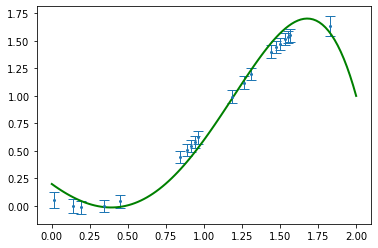

In [3]:
#  Assignment 1 - v - Full Bayesian Regression (θο not equal to true parameter vector)

# importing the required module 
import matplotlib.pyplot as plt 
import numpy as np
import random

# true paremeter vector
th = [-1, 0.9, 0.7, 0, -0.2, 0.2]

def get_y_train(t0, t1, t2, t3, t4, t5, mu, sigma, N, x):

  noise = np.random.normal(mu,sigma, size=(N,))
  y = t5*x**5 + t4*x**4 + t3*x**3 + t2*x**2 + t1*x + t0 + noise

  return (y)

random.seed()
theta_zero = np.array([-10.54, 0.465, 0.0087, 0, -0.093, -0.004]) # get the array from a list of values and get the transpose
sigma_h = 0.05

N = 20
x_train = np.array([])
for i in range(0, N):
  x_train = np.append(x_train, [random.random()*2])
x_train.sort()
y_train = get_y_train(th[5], th[0], th[1], th[2], th[3], th[4], 0, sigma_h, N, x_train)

sigma_theta = 2
Phi = np.zeros(shape = (N,6)) # 6 = polynomial degree + 1
Phi[:, -1] = 1

phi_x = []
for i in range(0,5):
  phi_x.append(np.power(x_train,i+1)*theta_zero[i])
  Phi[:,i] = np.power(x_train,i+1)*theta_zero[i]

phi_x.append(np.array([1]*N))

est_th_y = theta_zero + 1 / sigma_h * np.linalg.inv(1 / sigma_theta * np.eye(6) + 1 / sigma_h * Phi.T.dot(Phi)).dot(Phi.T).dot(y_train - Phi.dot(theta_zero))

print('μ_θ_y:')
print(est_th_y)
print('\n')
phi_x = np.array(phi_x)

est_y = phi_x.T.dot(est_th_y)

# print('μ_y:')
# print(est_y)
# print('\n')

sigma_y = sigma_h + sigma_h * sigma_theta * phi_x.T.dot(np.linalg.inv(sigma_h * np.eye(6) + sigma_theta * Phi.T.dot(Phi))).dot(phi_x) # variance - covariance matrix
y_var = sigma_y.diagonal()

x_true = np.linspace(0, 2, 100)
y_true = th[4]*x_true**5 + th[2]*x_true**3 + th[1]*x_true**2 + th[0]*x_true + th[5]


# plt.plot(x_train, est_y, marker= 'o', markersize=5, linewidth=0, label='bayes')
plt.errorbar(x_train, est_y, marker= 'o', markersize=2, linewidth=0, yerr= y_var, elinewidth = 1, capsize = 5, label='bayes')
plt.plot(x_true, y_true, '-g', linewidth=2, label= 'true_model')
